# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [5]:
!pip install pandas

And now we can import this package like so:

In [2]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [4]:
path = "sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [7]:
numerical_col = ['unit_price','quantity','total']
descriptive_stats = df[numerical_col].describe()
print(descriptive_stats)

        unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000


---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [8]:
!pip install seaborn

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [52]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  # value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  # print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}')
  plt.xticks(rotation=90, ha='center')

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  corr.style.background_gradient(cmap='coolwarm')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


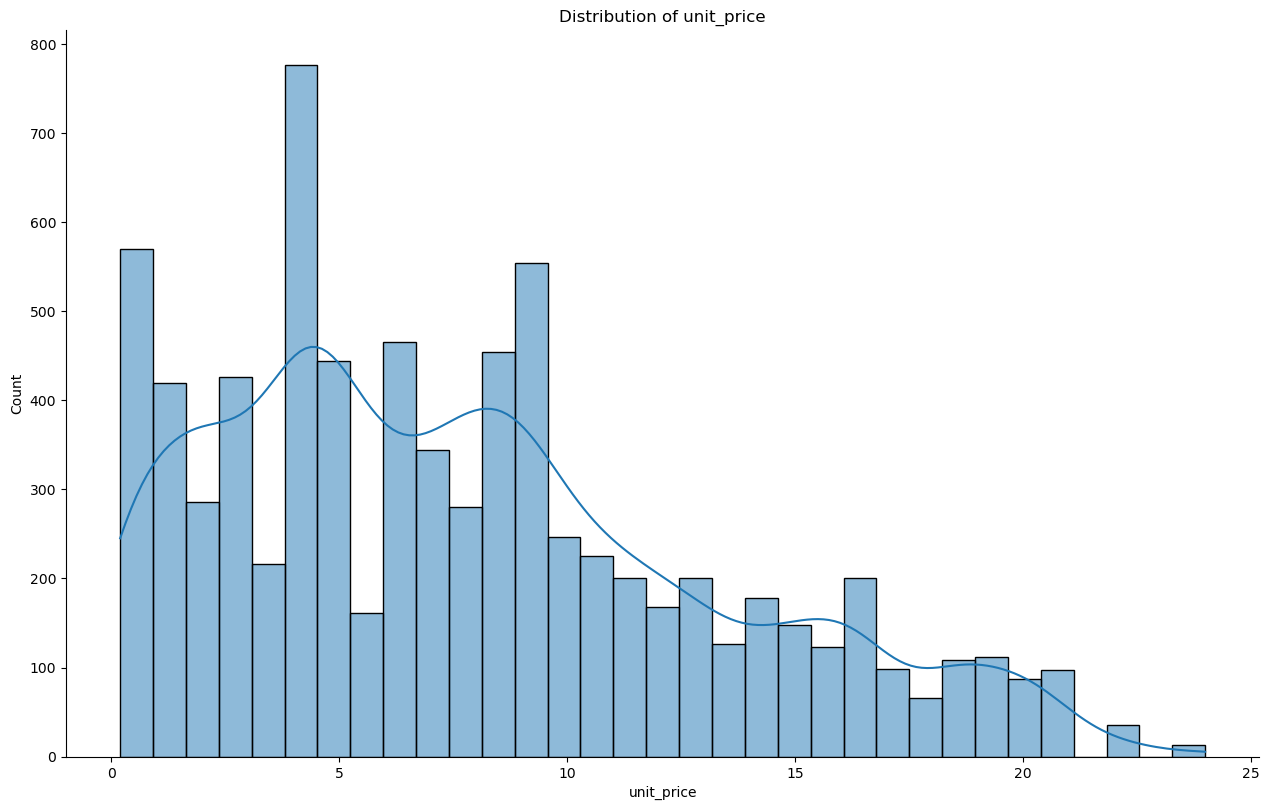

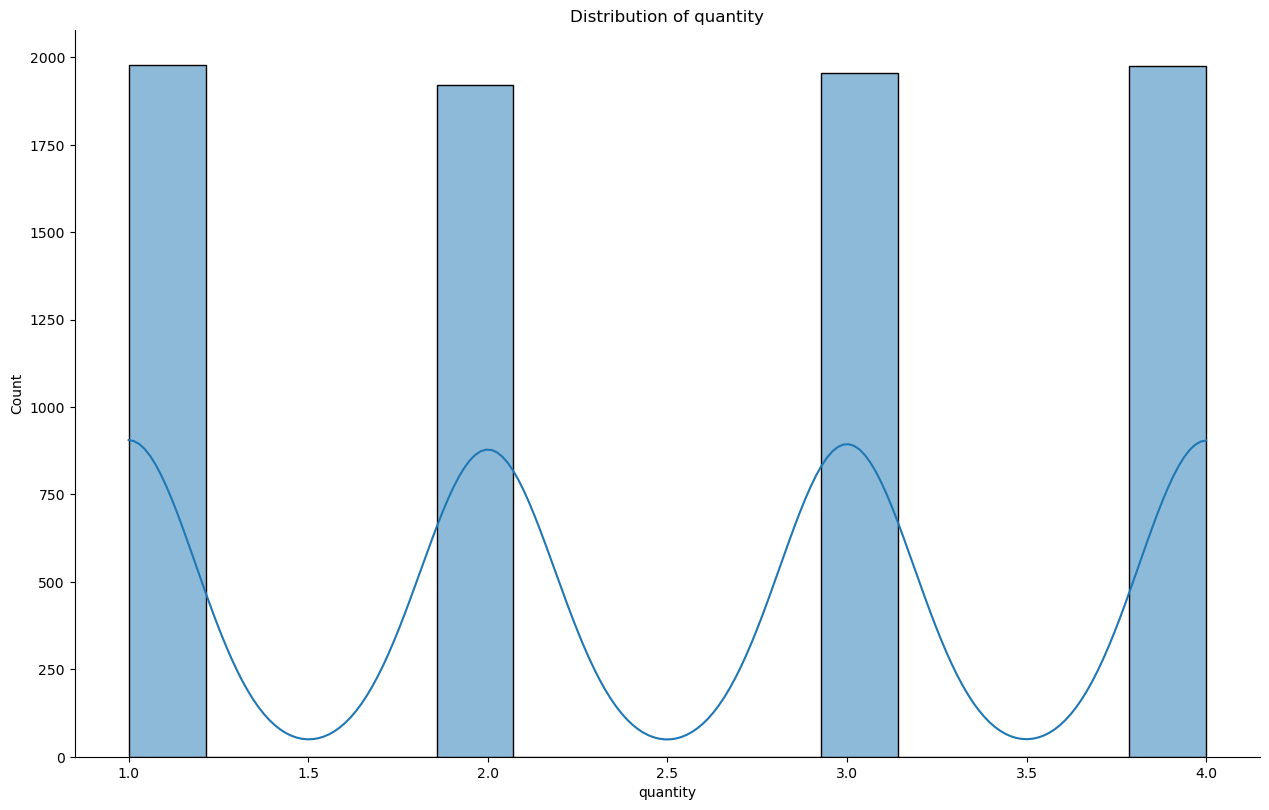

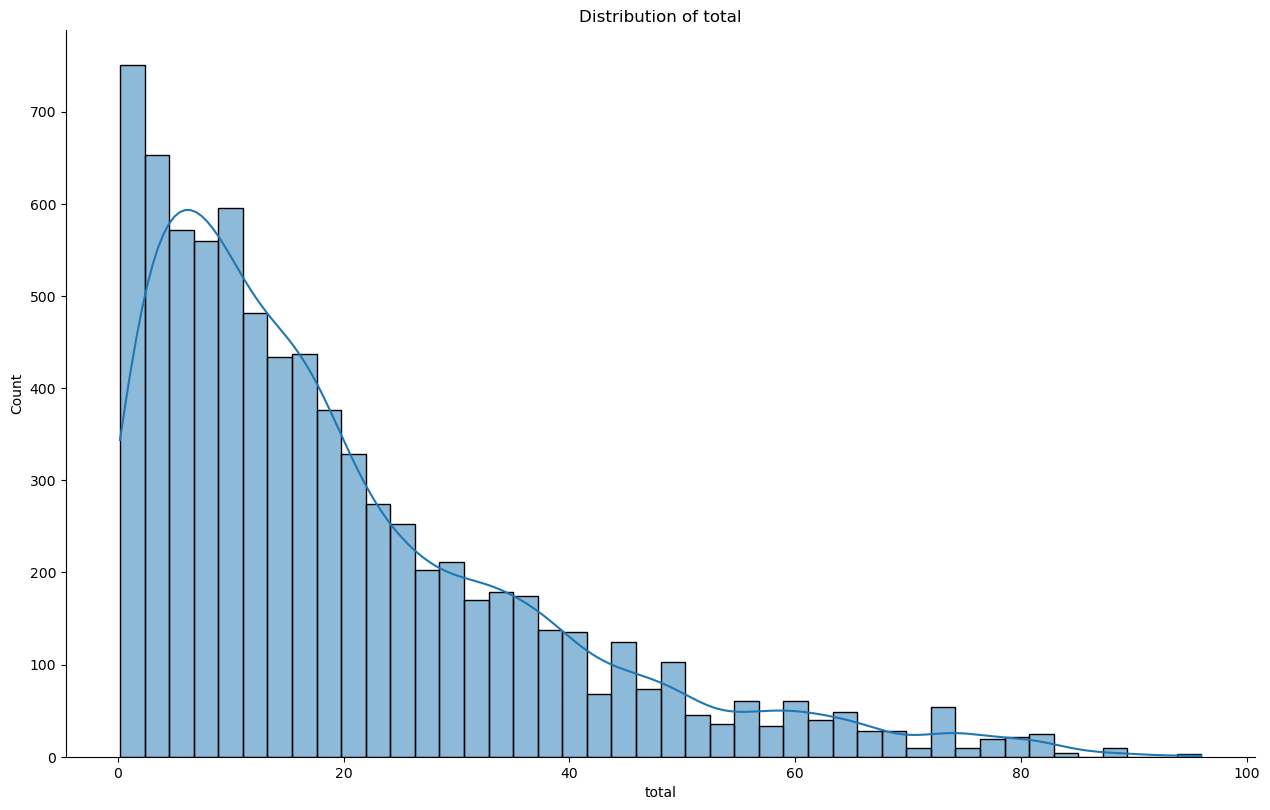

In [12]:
#visualising the numerical columns
for col in numerical_col:
    plot_continuous_distribution(df,col)

In [53]:
#number of categories
all_col=['product_id','category','customer_type','unit_price','quantity','total','payment_type']
for col in all_col:
    get_unique_values(df, col)

Column: product_id has 300 unique values

Column: category has 22 unique values

Column: customer_type has 5 unique values

Column: unit_price has 64 unique values

Column: quantity has 4 unique values

Column: total has 256 unique values

Column: payment_type has 4 unique values



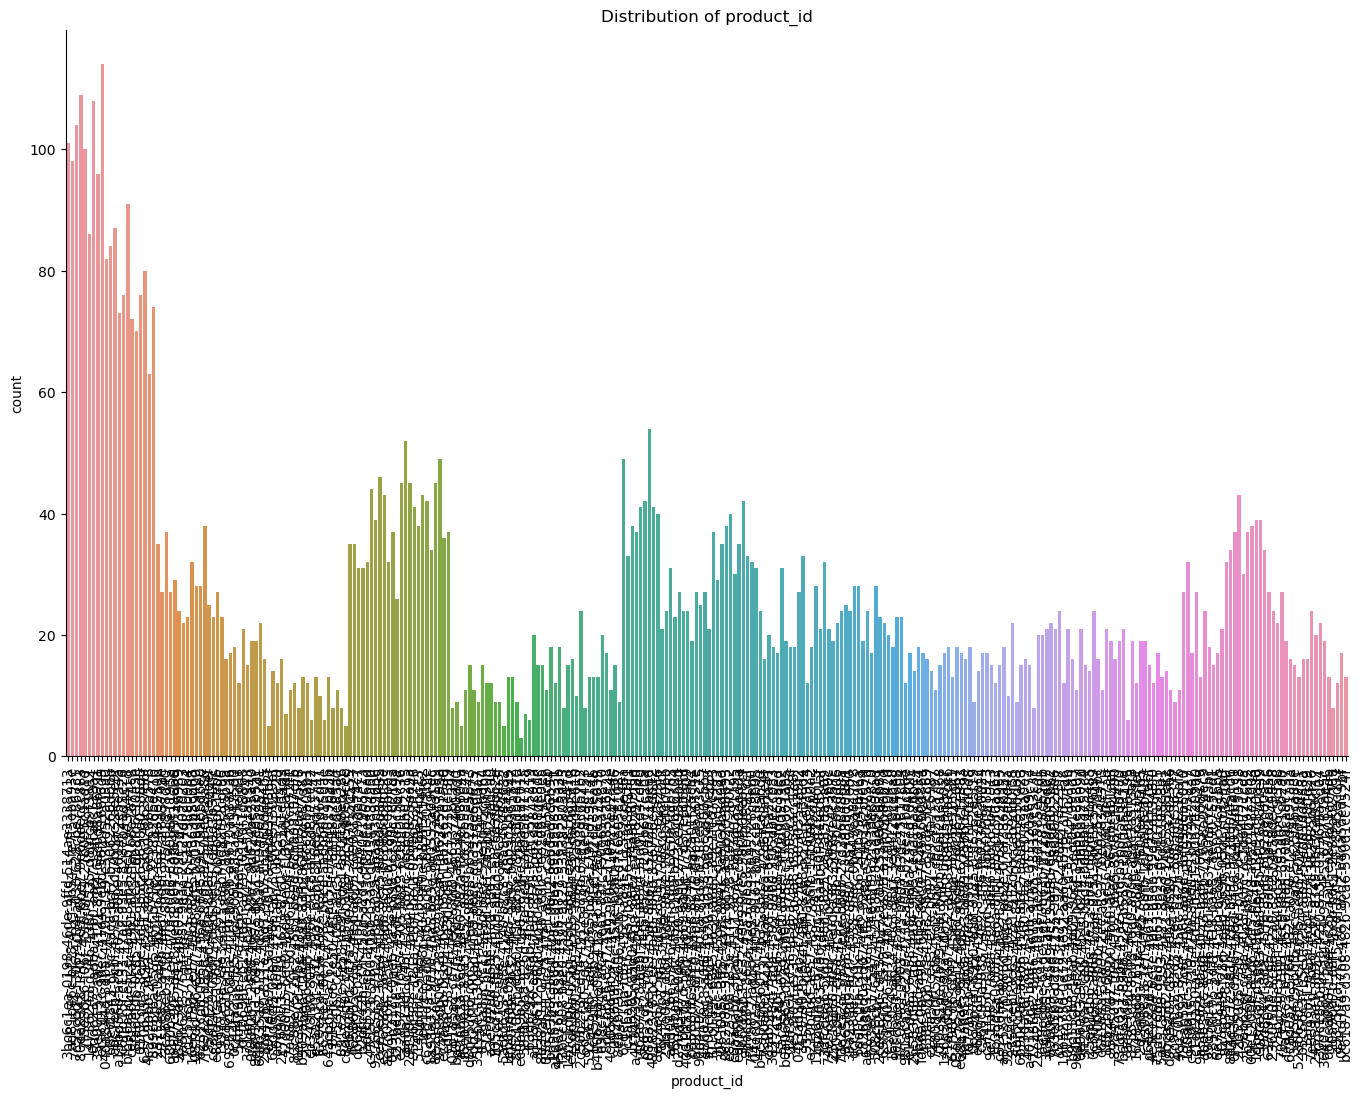

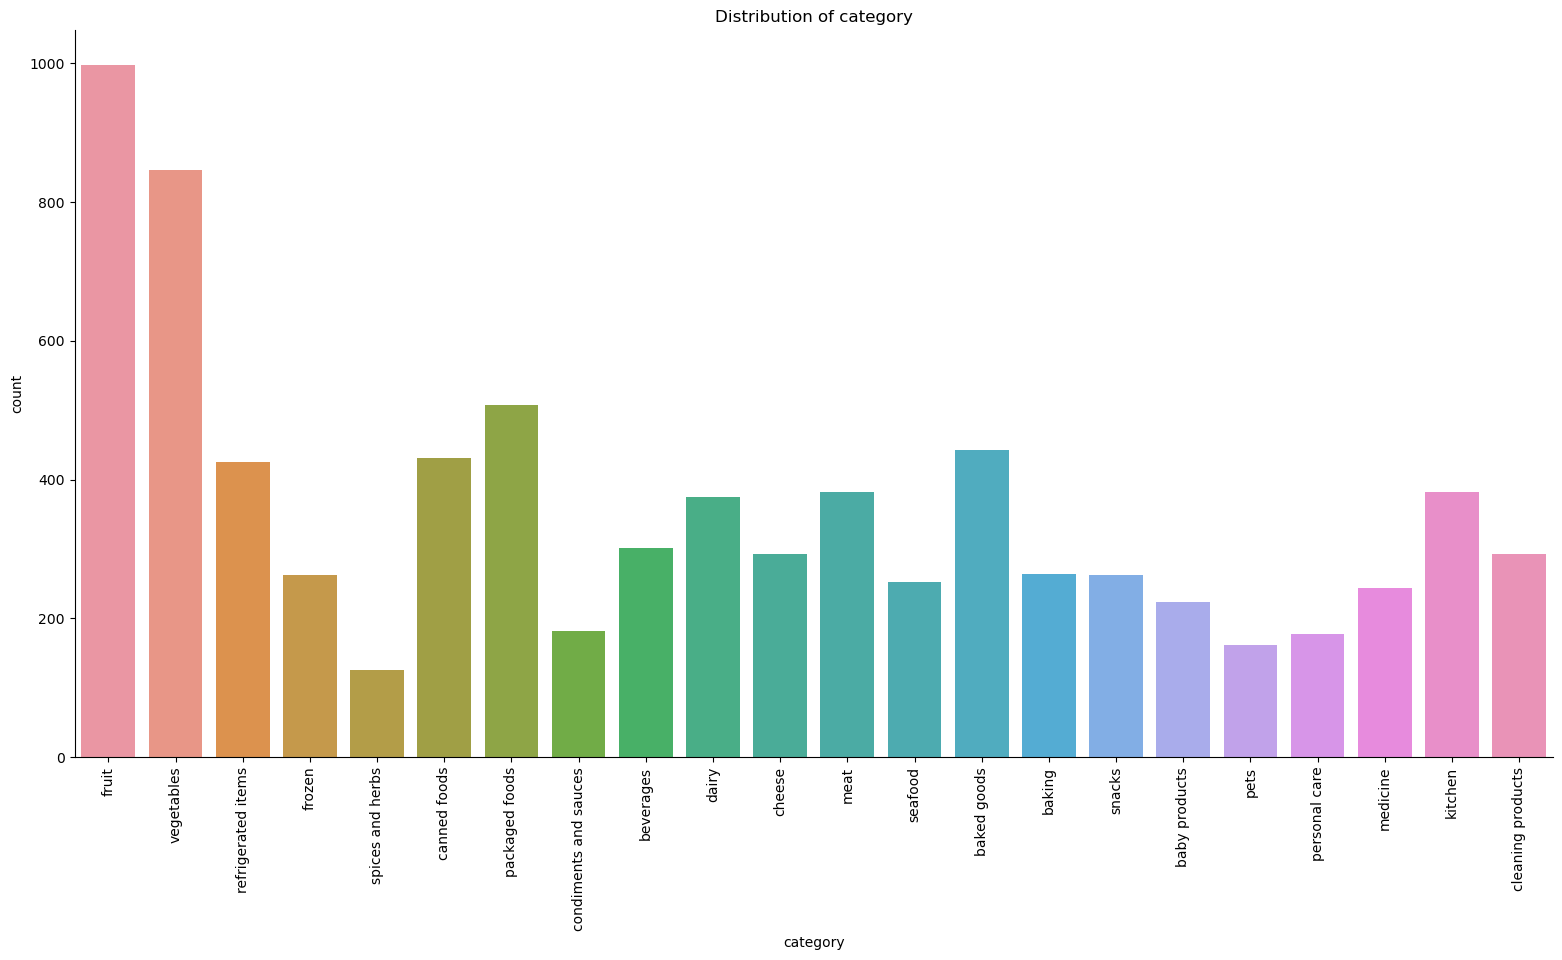

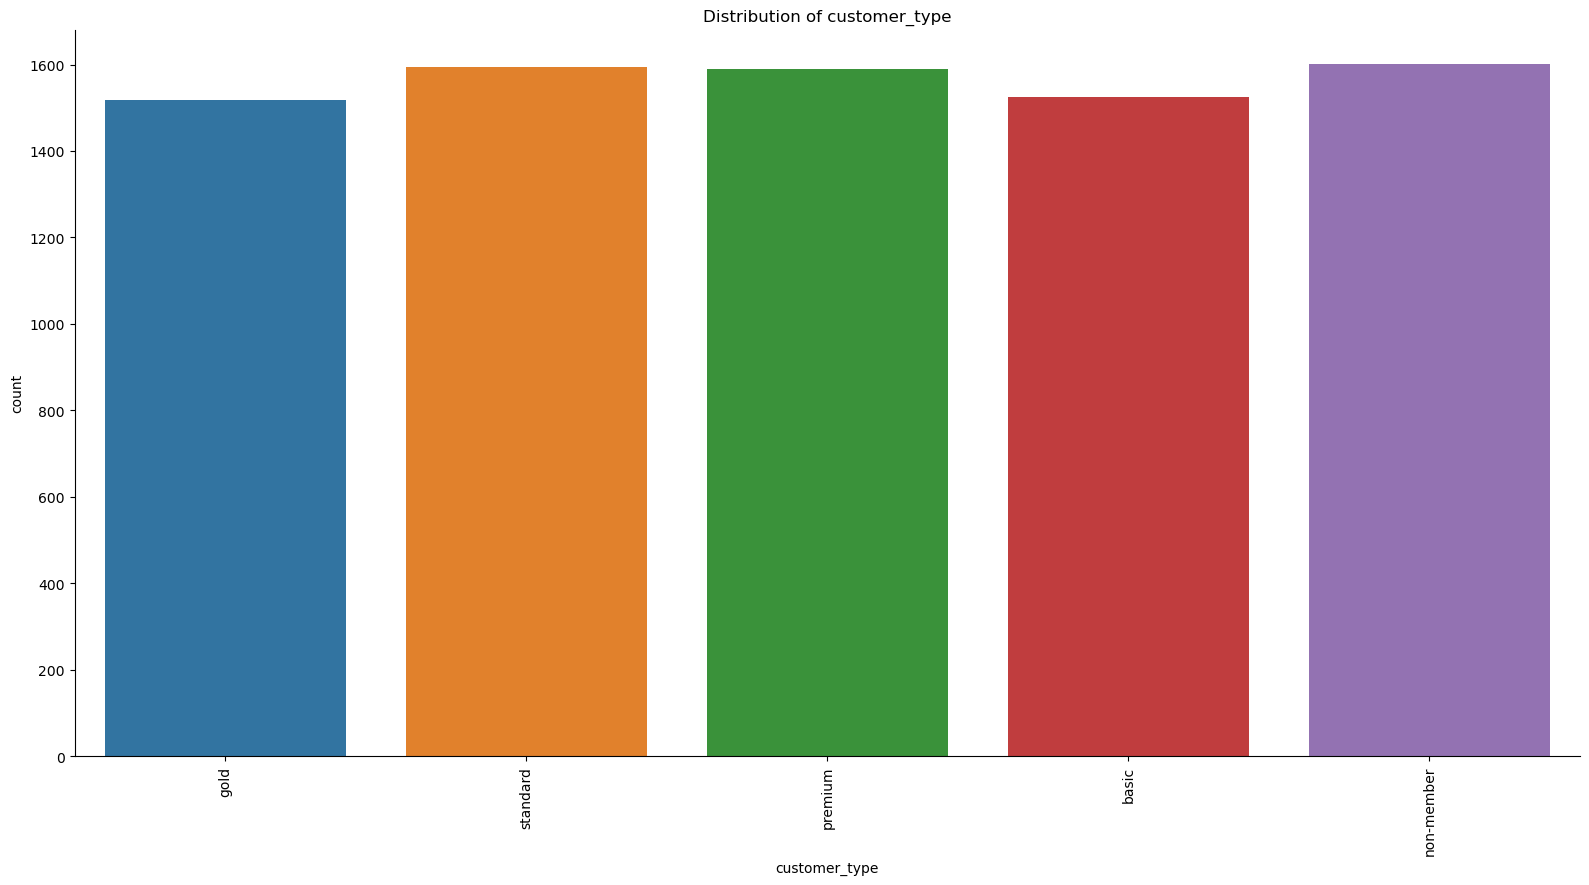

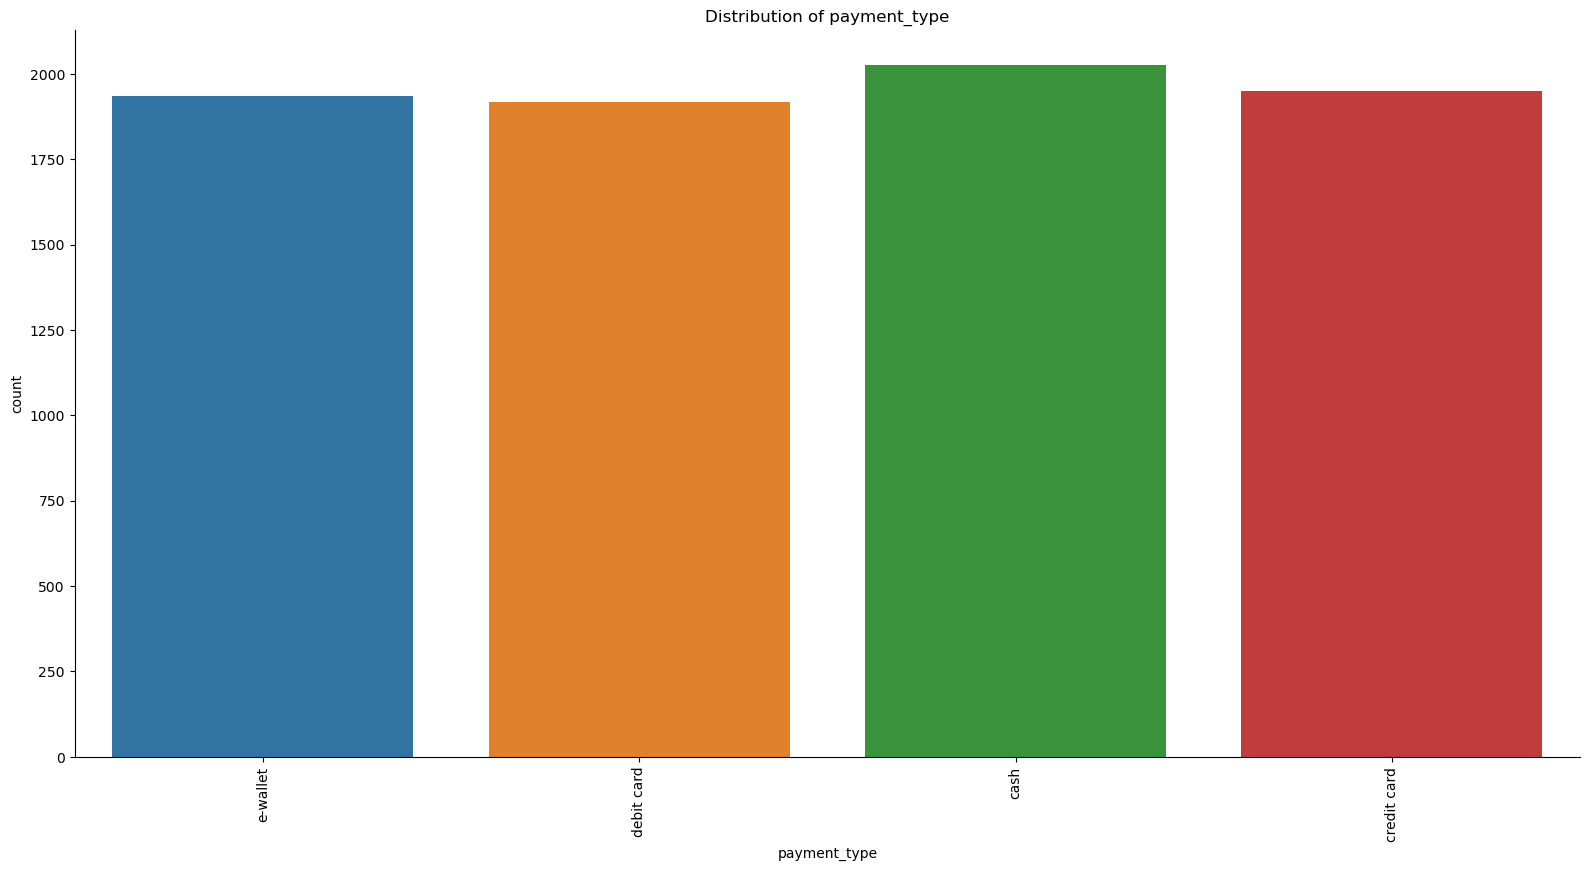

In [37]:
#analysing categorical columns
cat_cols=['product_id','category','customer_type','payment_type']
for col in cat_cols:
    plot_categorical_distribution(df,col)

In [99]:
category_total_sum = df.groupby('category')['total'].sum()

# Sort the grouped sums in descending order
category_total_sum_sorted = category_total_sum.sort_values(ascending=False)

# Apply head() function to get the top rows after sorting
top_category_total_sum = category_total_sum_sorted.head()
print(top_category_total_sum)

category
kitchen      14456.65
meat         14102.31
seafood      10754.81
medicine     10393.78
beverages     9930.64
Name: total, dtype: float64


In [102]:
category_total_sum = df.groupby('customer_type')['total'].sum()

# Sort the grouped sums in descending order
category_total_sum_sorted = category_total_sum.sort_values(ascending=False)

# Apply head() function to get the top rows after sorting
top_category_total_sum = category_total_sum_sorted.head()
print(top_category_total_sum)

customer_type
non-member    31755.24
premium       31655.68
standard      31388.78
gold          29939.99
basic         29569.16
Name: total, dtype: float64


In [103]:
category_total_sum = df.groupby('payment_type')['total'].sum()

# Sort the grouped sums in descending order
category_total_sum_sorted = category_total_sum.sort_values(ascending=False)

# Apply head() function to get the top rows after sorting
top_category_total_sum = category_total_sum_sorted.head()
print(top_category_total_sum)

payment_type
cash           41287.31
credit card    39309.52
debit card     37010.67
e-wallet       36701.35
Name: total, dtype: float64


In [107]:
category_total_sum = df.groupby('quantity')['total'].sum()

# Sort the grouped sums in descending order
category_total_sum_sorted = category_total_sum.sort_values(ascending=False)

# Apply head() function to get the top rows after sorting
top_category_total_sum = category_total_sum_sorted.head()
print(top_category_total_sum)

quantity
4    63298.56
3    45915.18
2    30012.20
1    15082.91
Name: total, dtype: float64


In [100]:
category_counts = df['category'].value_counts()

# Get the index (category name) of the maximum count
most_frequent_category = category_counts.idxmax()

print("Most frequent purchasing category:", most_frequent_category)

Most frequent purchasing category: fruit


In [104]:
category_counts = df['customer_type'].value_counts()

# Get the index (category name) of the maximum count
most_frequent_category = category_counts.idxmax()

print("Most frequent customer type:", most_frequent_category)

Most frequent customer type: non-member


In [105]:
category_counts = df['payment_type'].value_counts()

# Get the index (category name) of the maximum count
most_frequent_category = category_counts.idxmax()

print("Most frequent payment type:", most_frequent_category)

Most frequent payment type: cash


In [106]:
category_counts = df['quantity'].value_counts()

# Get the index (category name) of the maximum count
most_frequent_category = category_counts.idxmax()

print("Most frequent quantity:", most_frequent_category)

Most frequent quantity: 1


In [46]:
filtered_df=df[numerical_col];
correlation_plot(data=filtered_df)

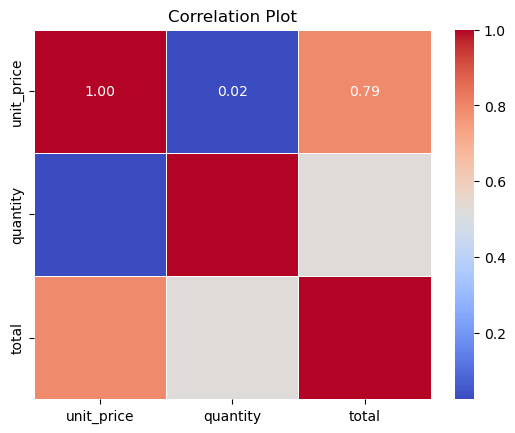

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_plot(data: pd.DataFrame = None, numerical_columns: list = None):
    if numerical_columns is None:
        numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
    filtered_data = data[numerical_columns]
    corr = filtered_data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Correlation Plot')
    plt.show()

# Assuming 'df' is your DataFrame and 'numerical_cols' contains the list of numerical columns
numerical_cols = ['unit_price', 'quantity', 'total']
correlation_plot(data=df, numerical_columns=numerical_cols)

['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']
['gold' 'standard' 'premium' 'basic' 'non-member']
customer_type          basic  gold  non-member  premium  standard
category                                                         
baby products             49    46          45       39        45
baked goods               87    73          85       89       109
baking                    53    55          47       55        54
beverages                 66    47          57       63        68
canned foods              89    77          88       93        84
cheese                    42    63          77       60        51
cleaning products         57    56          67       63        49
condiments and sauces     35    37          37       37        35

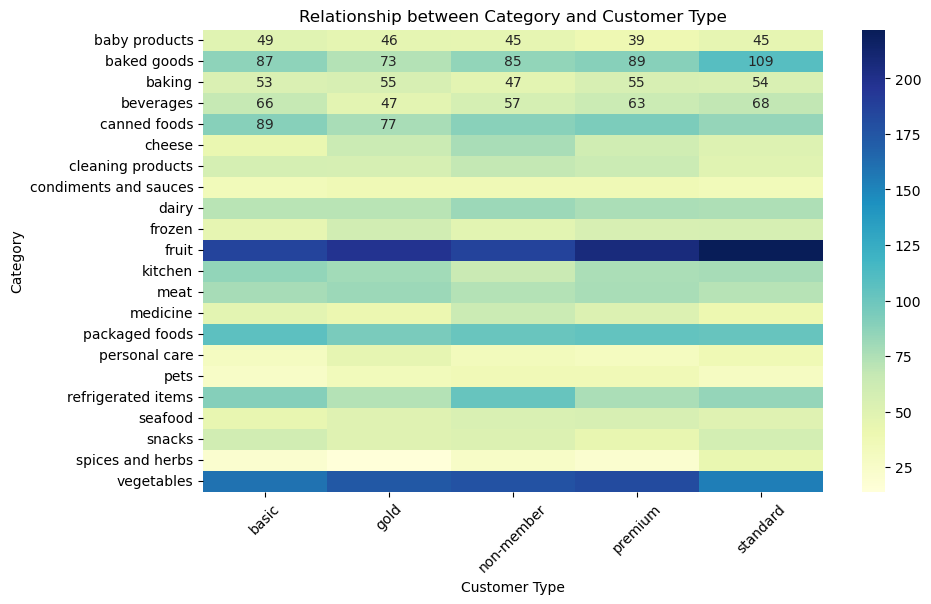

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check unique values in 'category' and 'customer_type' columns
print(df['category'].unique())
print(df['customer_type'].unique())

# Check value counts for each combination of 'category' and 'customer_type'
category_customer_counts = df.groupby(['category', 'customer_type']).size().unstack(fill_value=0)
print(category_customer_counts)
# Plot a heatmap to visualize the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(category_customer_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Relationship between Category and Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']
['gold' 'standard' 'premium' 'basic' 'non-member']
quantity                 1    2    3    4
category                                 
baby products           57   67   48   52
baked goods            122  107  103  111
baking                  73   63   63   65
beverages               69   71   79   82
canned foods           106  110  104  111
cheese                  57   66   86   84
cleaning products       77   75   62   78
condiments and sauces   43   48   49   41
dairy                   92   89   96   98
frozen                  65   61   75   62
fruit                  271  251  238  238
kitchen                 93   98   98   93
meat                   107   87   94   94
medicine                60   

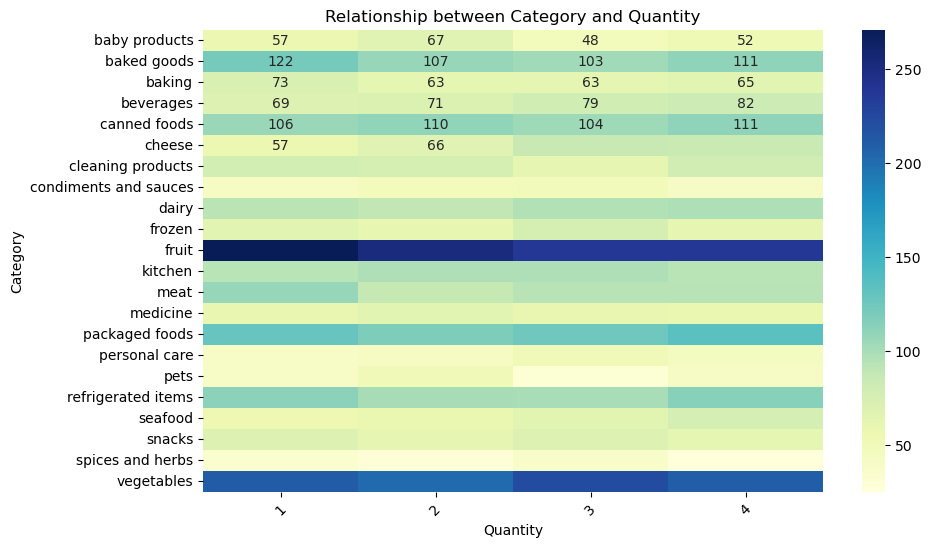

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check unique values in 'category' and 'customer_type' columns
print(df['category'].unique())
print(df['customer_type'].unique())

# Check value counts for each combination of 'category' and 'customer_type'
category_customer_counts = df.groupby(['category','quantity']).size().unstack(fill_value=0)
print(category_customer_counts)
# Plot a heatmap to visualize the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(category_customer_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Relationship between Category and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [73]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by date and calculate the daily total sale
daily_total_sale = df.groupby(df['timestamp'].dt.date)['total'].sum()

print("Daily Total Sale:")
print(daily_total_sale)

Daily Total Sale:
timestamp
2022-03-01    22183.96
2022-03-02    22500.79
2022-03-03    21405.47
2022-03-04    22262.64
2022-03-05    21803.03
2022-03-06    21865.79
2022-03-07    22287.17
Name: total, dtype: float64


In [85]:
# df.loc[df['total'].idxmax()]
top_5_max_values = df.nlargest(200, 'total')
category_wise_sale= top_5_max_values.groupby('category').agg({'quantity': 'sum', 'total': 'sum'})
print("category_wise_sale")
print(category_wise_sale)
# print("Top 5 Maximum Values:")
# print(top_5_max_values[['category','customer_type','unit_price','quantity','total']])

category_wise_sale
                   quantity    total
category                            
beverages                56  1024.64
cleaning products        72  1226.48
kitchen                 164  3029.56
meat                    116  2292.84
medicine                162  3514.18
personal care            24   407.76
seafood                 192  3623.28


Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

